# Project 4 :Abalone 

In [1]:
#loading the required libraries
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [3]:
#loading the dataset
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
#conversion of rings to age by adding 1.5 
#add target(age) to dataset[rings +1.5]
df['age']=df.Rings+1.5

#remove rings variable
df.drop('Rings',axis=1,inplace=True)

In [5]:
df.shape #shows 4177 rows and 9 columns (attributes including target column)

(4177, 9)

In [6]:
df.head() #shows first five data #validation :age in place of rings 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [7]:
df.sample(3) #show 3 random samples information of dataset

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
3056,M,0.615,0.485,0.215,0.9615,0.422,0.176,0.290,12.5
3406,I,0.350,0.280,0.075,0.1960,0.082,0.040,0.064,9.5
1700,M,0.635,0.500,0.170,1.4345,0.611,0.309,0.418,13.5


In [8]:
df.tail() #shows last 5 rows of the dataset 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,13.5


In [9]:
df.dtypes #shows the data types of each variables so "Sex" is categorical and others are float types

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
age               float64
dtype: object

In [10]:
df.isnull().sum() #no missing values are present so need of applying any imputation technique

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

<AxesSubplot:>

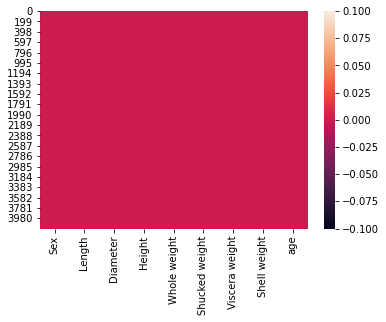

In [11]:
sns.heatmap(df.isnull()) #visual represenation that there is no null values present. if thers a null values then there would have been diff. colour shades in between. 

In [12]:
df.iloc[:,0] # as we want to apply label encoder to the categorical feature i.e SEX so separting out sex column.

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [13]:
lencoder=LabelEncoder()  #applied label encoder to 'Sex' columns converting categorical value to numerical value for analysis As Machine learning only understands numerical values.
df['Sex']=lencoder.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


# UNIVARIANTE ANALYSIS

univariate analysis using distplot to see whether they are normally distributed or skewness present

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

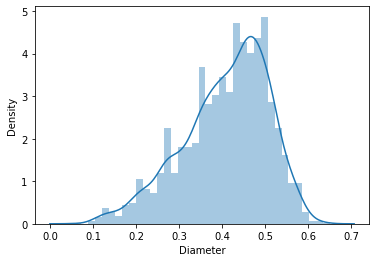

In [14]:
sns.distplot(df['Diameter']) 

The data of the column 'Diameter' is not much normalized.Its negatively skewed. 

<AxesSubplot:xlabel='Height', ylabel='Density'>

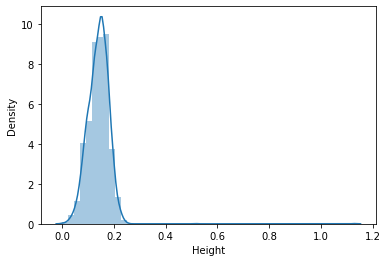

In [15]:
sns.distplot(df['Height'])

we observe high peak is formed in height and it lies far beywond the central positions.Its not normally distibuted.

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

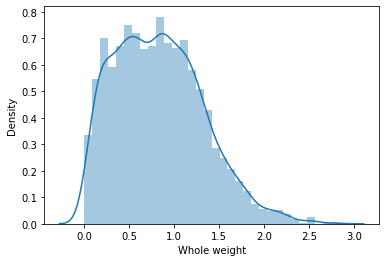

In [16]:
sns.distplot(df['Whole weight'])

The distribution of the data is not normally distributed and skewness present

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

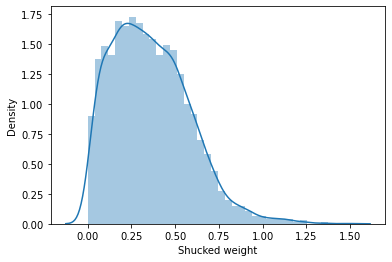

In [17]:
sns.distplot(df['Shucked weight'])

The curve is not normalised.Skewness present

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

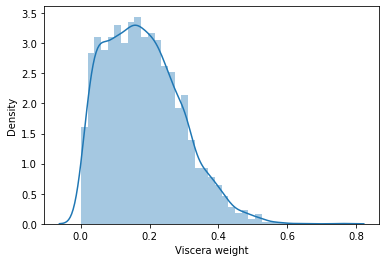

In [18]:
sns.distplot(df['Viscera weight']) 

The distribution is not normalised and skewness seen.

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

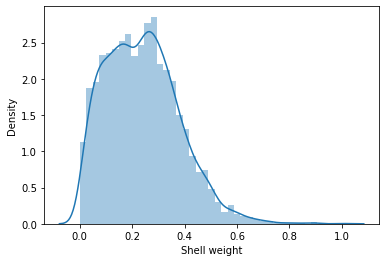

In [19]:
sns.distplot(df['Shell weight'])  

The distribution is not normalised and skewness is there.

<AxesSubplot:xlabel='age', ylabel='Density'>

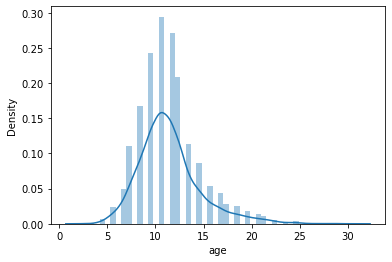

In [20]:
sns.distplot(df['age']) 

The curve is not that normalised.The building blocks is out of nornamilsed curve.

In [21]:
df.columns #showing all the columns features names in the dataset

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'age'], dtype='object')

In [22]:
#Categorical Analysis #data is balanced
obj = ['Sex']
for column in df[obj]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

SEX :  3
0    1307
1    1342
2    1528
Name: Sex, dtype: int64




This show there are 1307 females,1528 males and 1342 infant species.

<AxesSubplot:xlabel='Sex', ylabel='Count'>

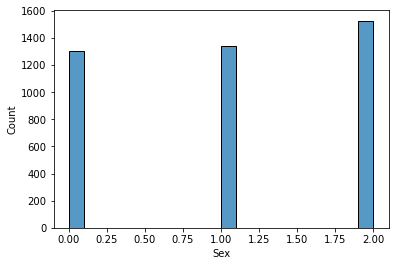

In [23]:
sns.histplot(df['Sex'],bins=20) #shows visual representation of male/female/infant counts. X axis is sex and y axis is counts.
#looking at the hisplot it shows that the data is evenly distributed and it is balanced.

<AxesSubplot:xlabel='age', ylabel='Count'>

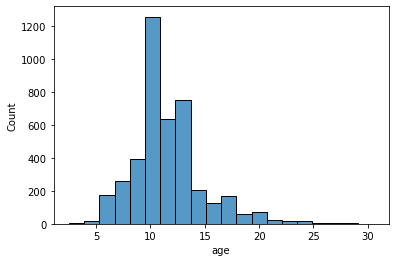

In [24]:
sns.histplot(df['age'],bins=20) #here abalone species age ranges between 5 and 20 yrs. 

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

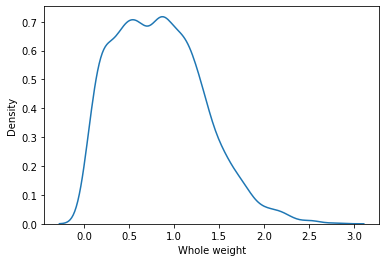

In [25]:
sns.kdeplot(df['Whole weight']) #univariate analysis #skewness is there

<AxesSubplot:xlabel='Shell weight', ylabel='Height'>

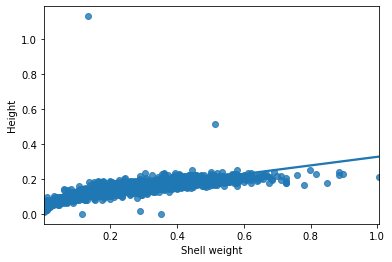

In [26]:
#Bivariate Analysis
sns.regplot(x="Shell weight",y="Height",data=df) 

As shell weight increases,the height is not dat increasing,remaing almost constant.So height and shell weight are not corelated.

<AxesSubplot:xlabel='age', ylabel='Diameter'>

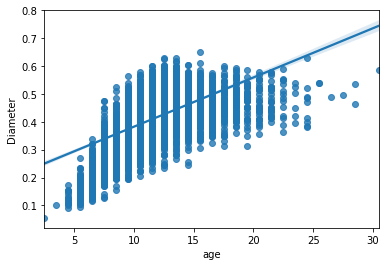

In [27]:
#Bivariate Analysis
sns.regplot(x="age",y="Diameter",data=df) #As rings(age) incraeses thus diameter of the shell also increases

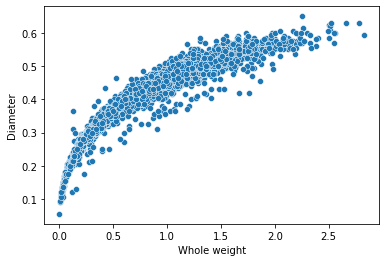

In [28]:
#Bivariate Analysis as we are taking two columns to analyse using scatter plot
sns.scatterplot(x="Whole weight",y="Diameter",data=df); 
                                                        

As whole weight increases ,the diameter of the species also increases.

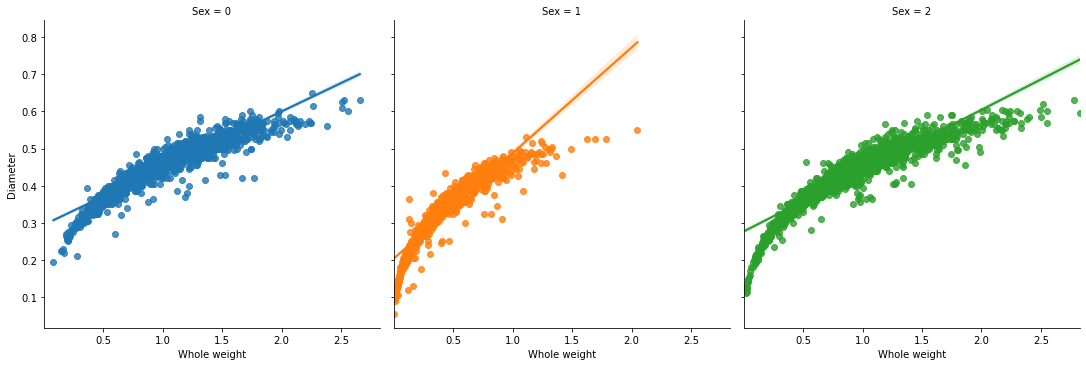

In [29]:
sns.lmplot(x="Whole weight",y="Diameter",hue='Sex',col='Sex',data=df) 

The graph above shows Male,Females & Infants whole weight vs diametet are positivly correlated and also linear.
Able to disntinguish better between three categories.

<AxesSubplot:xlabel='Sex', ylabel='age'>

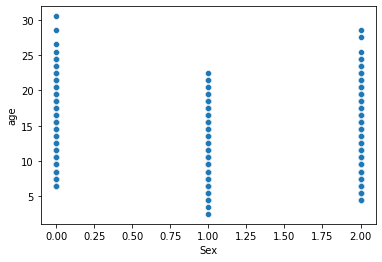

In [30]:
#Scatterplot
import seaborn as sns
sns.scatterplot(x="Sex",y="age",data=df) 

female and male sex are moreless same level and infant age range from 2 approx to22yrs. 
Age of the abalone are equally distributed between catagories

<AxesSubplot:xlabel='Height', ylabel='age'>

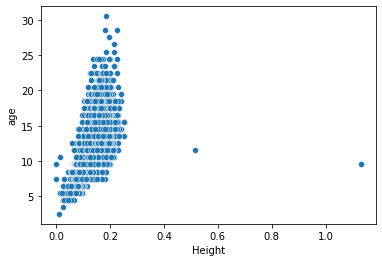

In [31]:
import seaborn as sns
sns.scatterplot(x="Height",y="age",data=df) 

#Scatter plot shows height is linear with the age

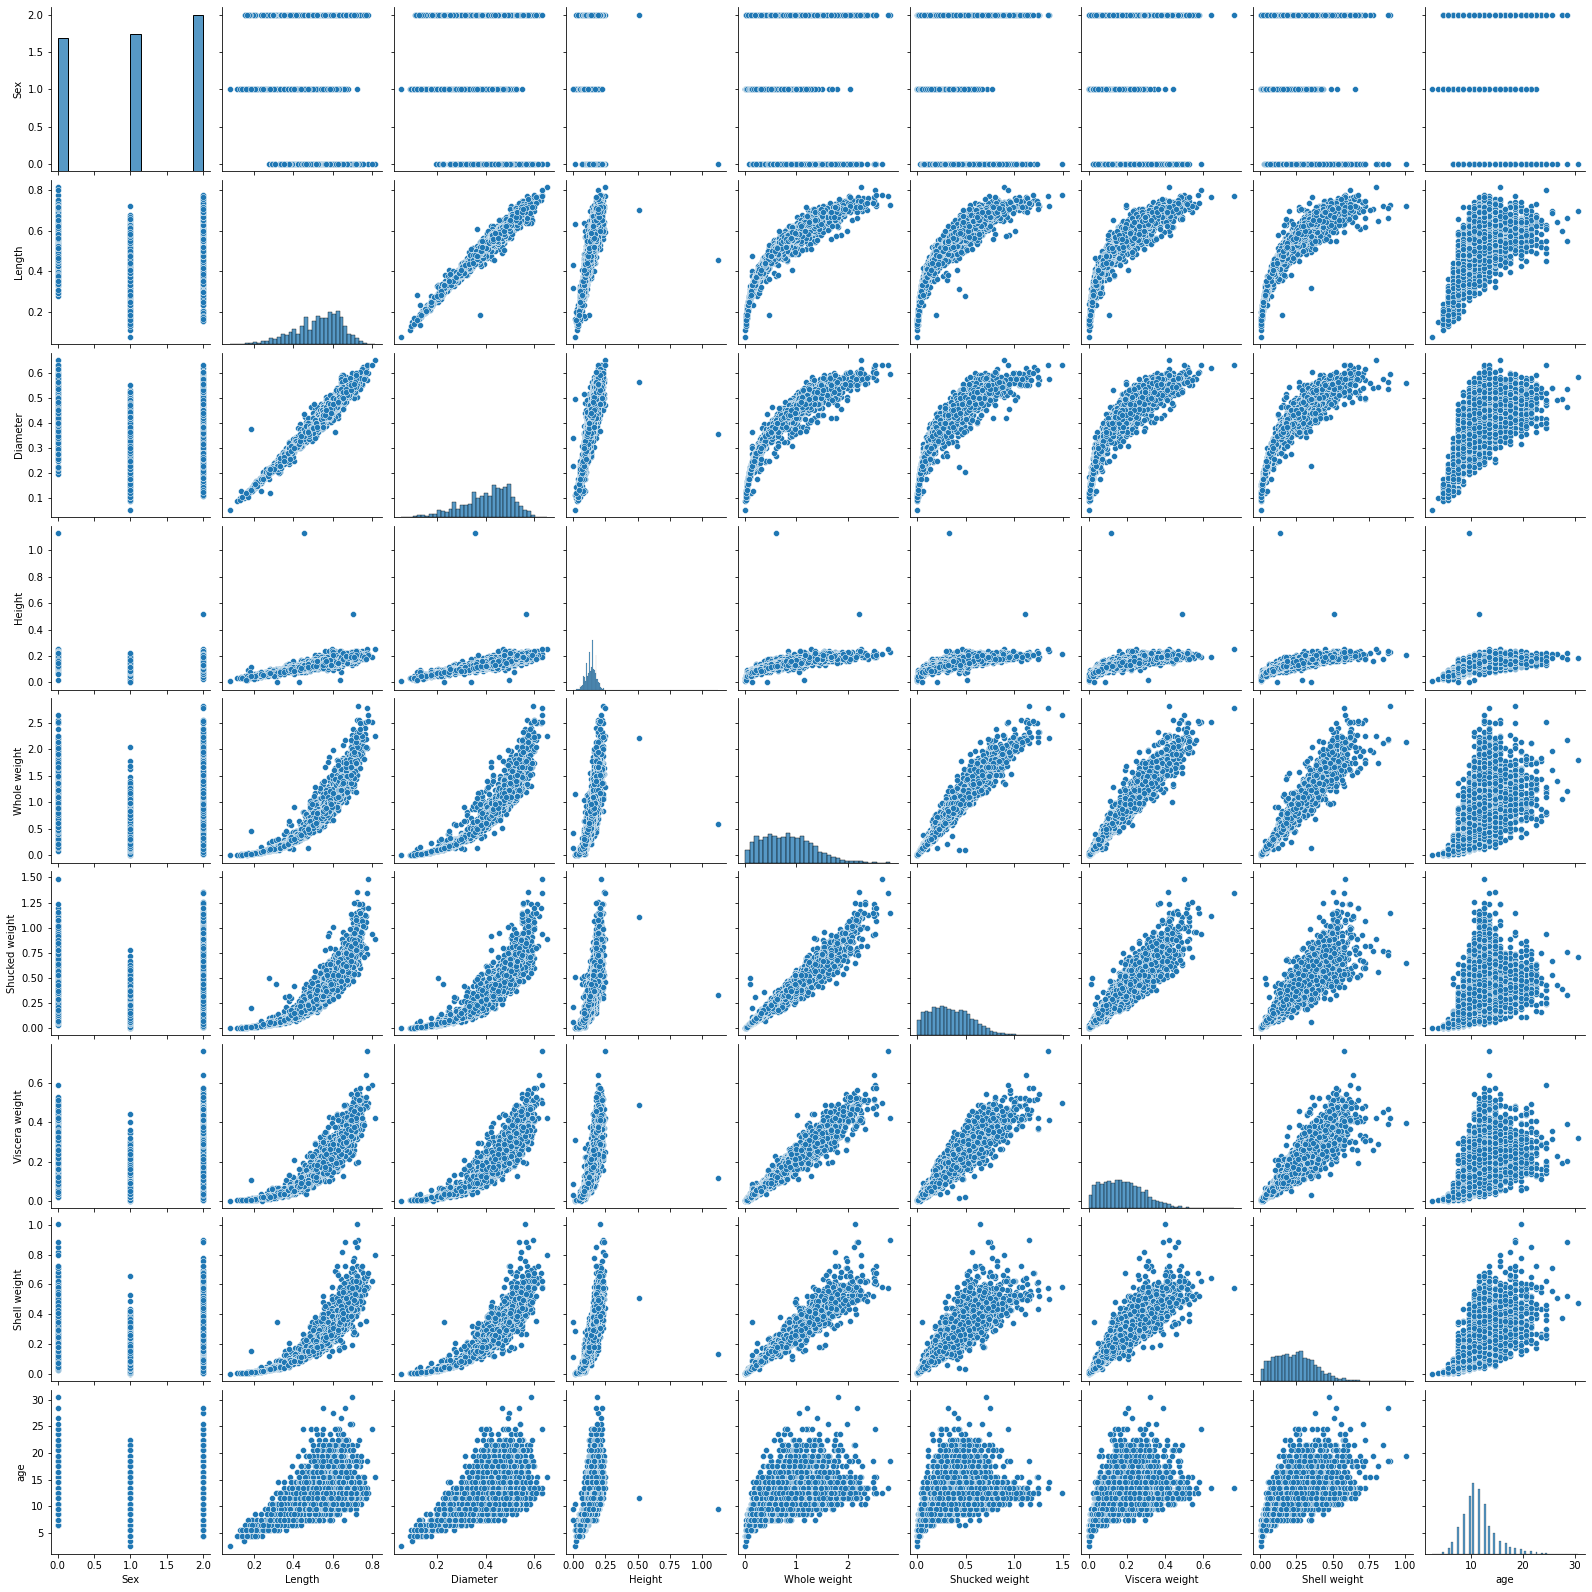

In [32]:
sns.pairplot(df) #shows multiple pairwise bivariate distributions in a dataset and shows relationship bw them.

In [33]:
#Observation :some features has a linear relationship with target like length,diameter,height,whole weight ,shucked weight etc 
#Also most of the features showing strong correlation among them. 

In [34]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [35]:
#checkinh height equalto 0 and replace with mean imputation.
(df.Height==0).sum()

2

In [36]:
df[df['Height']==0]  

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
1257,1,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,1,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


#It shows columns where height is 0 and these two values are in infant sex which may be measurement error.
So either we can delete this two rows or impute it with average values.So i m taking the average values here.

In [37]:
average=pd.pivot_table(df,index=['Sex'],aggfunc={'Height':np.mean})
average

,Height
Sex,
0,0.158011
1,0.107996
2,0.151381


In [38]:
df['Height']=df['Height'].replace(to_replace=0,value=0.107996)

In [39]:
df.describe() #validating height ..it is replace by average values.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139568,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.822240,0.120093,0.099240,0.041721,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [40]:
#checking skewness
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.166698
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
age               1.114102
dtype: float64

1)If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
2)if the skewness is less than -1 (negatively skewed) or greater than 1 (positively skewed), the data are highly skewed.
So here We can see some of the data are highly skewed like Height,age.so we will consider here height to remove skewness.

In [41]:
#removing the skewness of height
import numpy as np
df['Height']=np.sqrt(df['Height'])
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height           -0.175124
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
age               1.114102
dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

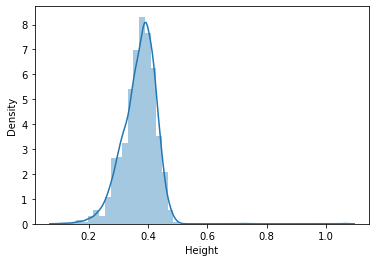

In [42]:
sns.distplot(df['Height'])
# checking via graph whether skewness is removed or not. 
#It shows skewness little removed now and now its little bit normally distributed.

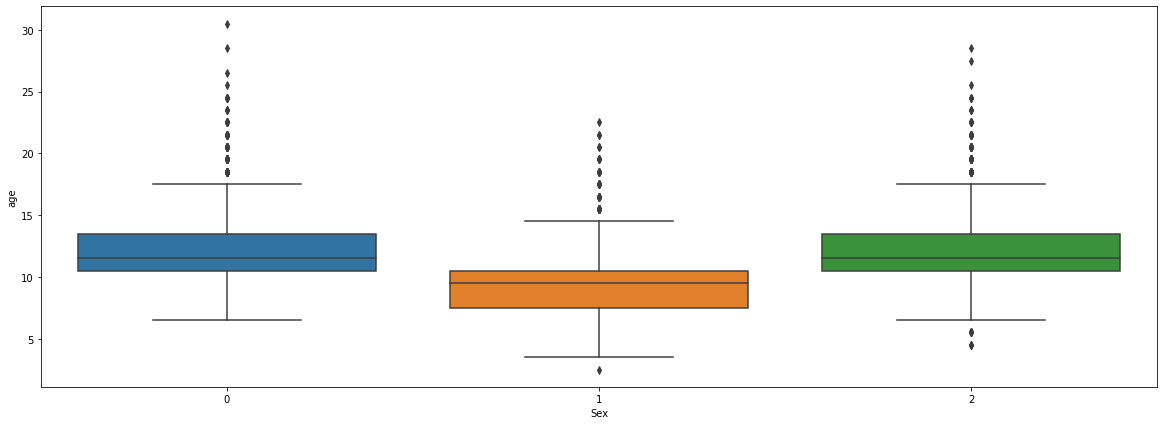

In [43]:
#BoxPlot #representation of Female=0,Infant=1,Male=2
plt.figure(figsize=(20,7))
sns.boxplot(data = df, x='Sex', y='age')
plt.show()

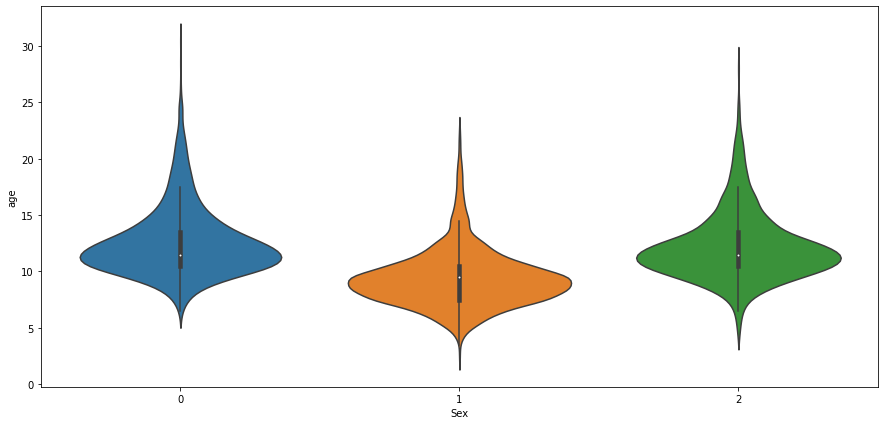

In [44]:
#BoxPlot
plt.figure(figsize=(15,7))
sns.violinplot(data = df, x='Sex', y='age')
plt.show()

Observation:
    1.The oldest abalone is female having age above 30 yrs.
    
    2.Female age is varies between 5 and 22.Infant age between 2.5 and 22 yrs approx.Male age is between 4 and 27 yrs

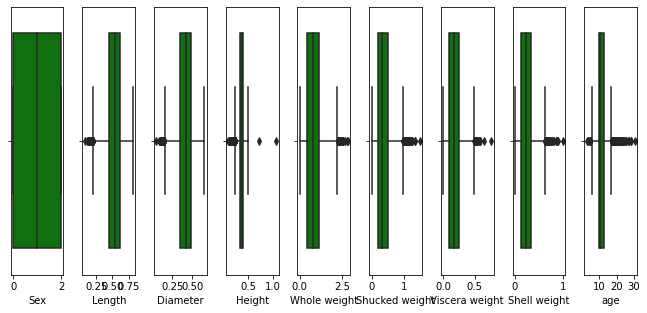

In [45]:
#checking ouliers by visual representation
import matplotlib.pyplot as plt
collist=df.columns.values
ncol=20
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

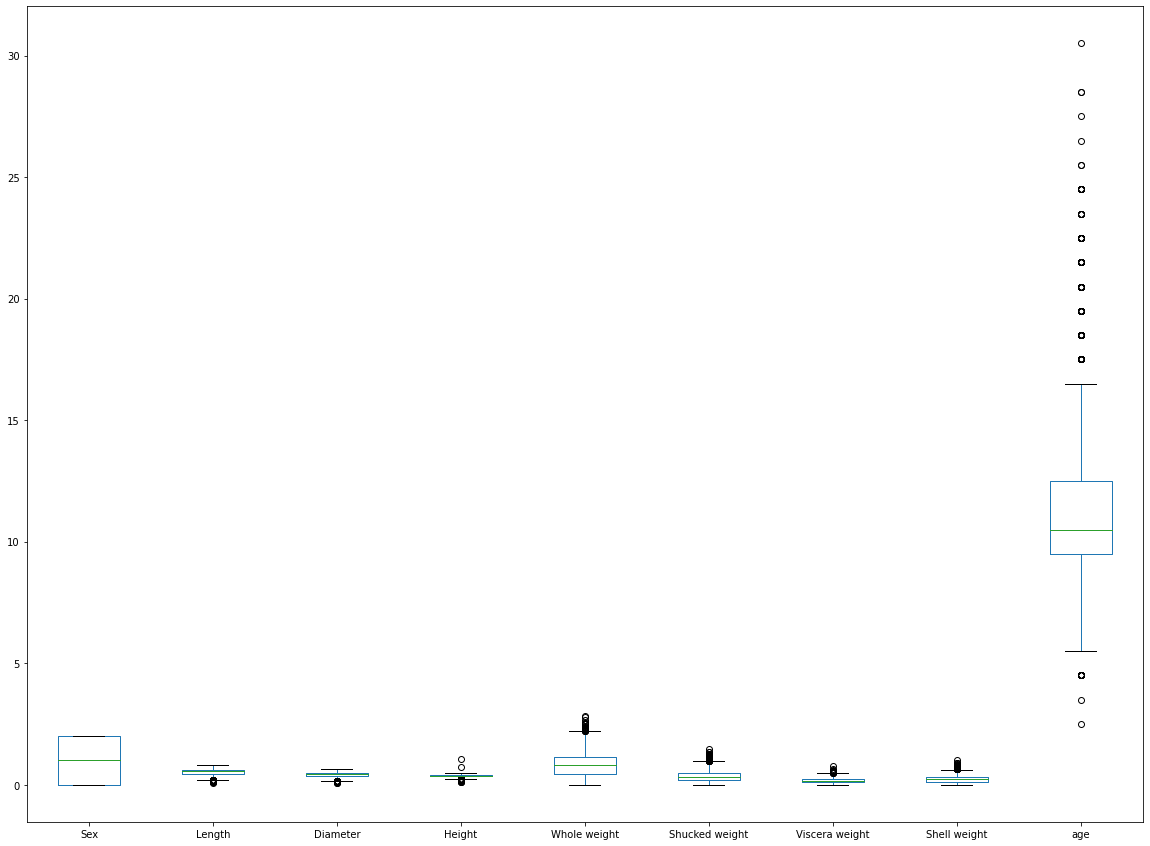

In [46]:
#Boxplot
df.plot(kind='box',figsize=(20,15))
plt.show()

#outliers are present in rings,height,shucked weight,viscera wt,shell weight.

In [47]:
#detecting outliers
from scipy.stats import zscore
dfzcore=np.abs(zscore(df))
print(np.where(dfzcore>3)) #those coeffiecients value  greater than 3 are displayed as outliers.

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  174,  181,  232,  236,  236,  236,  237,
        237,  237,  238,  238,  238,  239,  239,  270,  275,  277,  278,
        294,  306,  310,  313,  314,  321,  333,  334,  351,  355,  358,
        358,  362,  375,  416,  417,  428,  431,  433,  469,  478,  480,
        501,  525,  526,  526,  526,  530,  572,  628,  673,  674,  675,
        678,  694,  694,  696,  696,  718,  719,  719,  719,  720,  720,
        720,  744,  754,  756,  811,  891,  891,  891, 1048, 1051, 1051,
       1052, 1055, 1056, 1174, 1193, 1197, 1199, 1202, 1204, 1206, 1206,
       1207, 1207, 1207, 1207, 1209, 1209, 1417, 1417, 1418, 1422, 1426,
       1427, 1427, 1427, 1428, 1429, 1429, 1429, 1528, 1754, 1756, 1757,
       1759, 1761, 1762, 1762, 1762, 1763, 1763, 1763, 1821, 1824, 1982,
       1986, 1986, 1987, 1987, 1987, 2051, 2090, 2108, 2108, 2114, 2114,
       2114, 2157, 2161, 2169, 2171, 2172, 2176, 2

In [48]:
#Removing outliers
dfnew=df[(dfzcore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)
df=dfnew

dfnew.shape= (4010, 9)


In [50]:
loss_percent=(4177-4010)/4177*100
print(loss_percent,'%')

3.998084749820445 %


Thus we can compare that earlier the shape was 4177 and now after removal of outliers its is 4019 ,
so 158 ouliers have been removed.So data loss is around 3.99% approx which is acceptable. 

In [51]:
#checking correlation 
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,1.000000,-0.042128,-0.045150,-0.045851,-0.033643,-0.015229,-0.044093,-0.042888,-0.032413
Length,-0.042128,1.000000,0.985523,0.905061,0.936022,0.910595,0.909276,0.914478,0.558053
Diameter,-0.045150,0.985523,1.000000,0.910704,0.935360,0.905230,0.905123,0.921598,0.576516
Height,-0.045851,0.905061,0.910704,1.000000,0.883656,0.835966,0.861446,0.890427,0.611527
Whole weight,-0.033643,0.936022,0.935360,0.883656,1.000000,0.970684,0.966252,0.960012,0.542249
Shucked weight,-0.015229,0.910595,0.905230,0.835966,0.970684,1.000000,0.929370,0.894275,0.433144
Viscera weight,-0.044093,0.909276,0.905123,0.861446,0.966252,0.929370,1.000000,0.917821,0.516870
Shell weight,-0.042888,0.914478,0.921598,0.890427,0.960012,0.894275,0.917821,1.000000,0.616974
age,-0.032413,0.558053,0.576516,0.611527,0.542249,0.433144,0.516870,0.616974,1.000000


<AxesSubplot:>

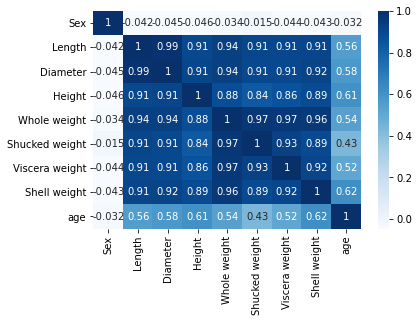

In [52]:
sns.heatmap(df.corr(),cmap="Blues",annot= True)

Observation: 
1.Length and diameter are higly correlated about 99%

2.Whole weight and shucked weight are higly correlated about 93%

3.Shell weight and viscera are higly correlated around 92%

4.Age is least correlated with Shucked Weight

This shows the most columns shows multicollinearity which needs to be addressed.
 
    

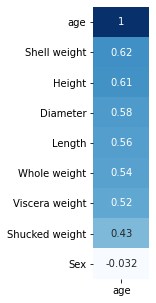

In [53]:
#Correlation btw variables and target
plt.figure(figsize=(1,5))
sns.heatmap(
    df.corr(method='pearson')[['age']].sort_values('age', ascending=False), 
    annot=True, cbar=False, cmap='Blues')
plt.show()

Thus we see shell weight & Height are mostly correlated with age around 62% then Diameter at 58%. Sex contributing least. 

# Addressing Multicollinearity via Variance inflation factor(VIF)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
x=df.iloc[:,0:-1]  #splitting into indeprndent and dependent variable
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960


In [56]:
y=df.iloc[:,-1]
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 4010, dtype: float64

In [57]:
def vif_cal():
    vif=pd.DataFrame()
    vif["Features"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [58]:
vif_cal()

         Features  VIF Factor
0             Sex    2.630966
1          Length  802.756838
2        Diameter  763.081484
3          Height  155.387829
4    Whole weight  433.792475
5  Shucked weight  109.035218
6  Viscera weight   65.374168
7    Shell weight   90.029391


In [59]:
df.drop(["Length","Shucked weight"],axis=1,inplace=True)

In [60]:
x=df.iloc[:,:-1] #validating again whether columns dropped or not.
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.308221,0.5140,0.1010,0.1500
1,2,0.265,0.300000,0.2255,0.0485,0.0700
2,0,0.420,0.367423,0.6770,0.1415,0.2100
3,2,0.365,0.353553,0.5160,0.1140,0.1550
4,1,0.255,0.282843,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490
4173,2,0.440,0.367423,0.9660,0.2145,0.2605
4174,2,0.475,0.452769,1.1760,0.2875,0.3080
4175,0,0.485,0.387298,1.0945,0.2610,0.2960


In [61]:
vif_cal()
#again validating vif and it shows certain vif. Though its showing vif values,as we have already dropped 2 varible ,
#we cant dropped again as we are left with only 6 variables. 
#thus this is a feature selection,we are selecting variable for model and here 6 variables are selected for model.

         Features  VIF Factor
0             Sex    2.621425
1        Diameter  207.969068
2          Height  131.862433
3    Whole weight  139.623781
4  Viscera weight   60.746439
5    Shell weight   57.860545


In [62]:
x.shape

(4010, 6)

In [63]:
y.shape

(4010,)

In [64]:
#Normalization of dataset
#as we can see that certain columns are not normalise like sex columns,columns having three decimals,four decimals places.so
#these are not scaled properly.All should be in standard format. 
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.15841552, -0.43855667, -1.18920784, -0.64253867, -0.73217769,
        -0.64115722],
       [ 1.15841552, -1.49745133, -1.3510049 , -1.27757608, -1.24211381,
        -1.26931847],
       [-1.28323821,  0.14383539, -0.02399892, -0.28374804, -0.33879839,
        -0.17003628],
       ...,
       [ 1.15841552,  0.72622746,  1.65574844,  0.81463555,  1.07930969,
         0.59946125],
       [-1.28323821,  0.83211692,  0.36717168,  0.63524023,  0.82191336,
         0.50523707],
       [ 1.15841552,  1.57334319,  1.43568354,  2.51503901,  1.94377284,
         2.06778818]])

In [65]:
#invert difference
#inverted=scale.inverse_transform(x)
#print(inverted)

In [66]:
#dx=pd.DataFrame(inverted)
#dx

In [67]:
#Training the model
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=55)

# Base Model:Linear Regression

In [68]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([ 0.03367528,  0.29656654,  1.07710548, -2.62773305,  0.14062612,
        2.93635333])

In [69]:
#making dataframe :more distinguisable:- features with its coefficient value
features=['Sex ','Diameter','Height','Whole weight','Viscera weight','Shell weight']
list(zip(features,lr.coef_))  
cfdf=pd.DataFrame(data=lr.coef_,index=features)
cfdf

,0
Sex,0.033675
Diameter,0.296567
Height,1.077105
Whole weight,-2.627733
Viscera weight,0.140626
Shell weight,2.936353


In [70]:
lr.intercept_

11.262148588913222

In [71]:
lr.score(x_train,y_train)

0.45761443862480544

In [72]:
pred=lr.predict(x_test)
pred

array([11.95740882,  8.86958662, 13.24587422, ..., 13.02528146,
        9.95635752, 12.09769915])

In [73]:
print("Predicted values",pred)

Predicted values [11.95740882  8.86958662 13.24587422 ... 13.02528146  9.95635752
 12.09769915]


In [74]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,11.957409
1,8.869587
2,13.245874
3,13.980631
4,13.559504
...,...
1319,12.074266
1320,13.107176
1321,13.025281
1322,9.956358


In [75]:
lr.score(x_test,y_test)

0.42245757007596163

In [76]:
print("Mean absolute error :",mean_absolute_error(y_test,pred))
print("Mean squared error :",mean_squared_error(y_test,pred))
print("Root mean error :",np.sqrt(mean_squared_error(y_test,pred)))
print("R2_Score",r2_score(y_test,pred))

Mean absolute error : 1.5758023676862456
Mean squared error : 4.446177866815799
Root mean error : 2.1085961839137903
R2_Score 0.42245757007596163


In [77]:
invert_pred=scale.inverse_transform(x_test)
print(invert_pred)

[[0.         0.49       0.39370039 1.122      0.228      0.3055    ]
 [1.         0.28       0.3082207  0.257      0.059      0.07      ]
 [0.         0.525      0.43588989 1.6015     0.365      0.43      ]
 ...
 [2.         0.46       0.39370039 1.03       0.207      0.3305    ]
 [1.         0.35       0.33166248 0.4        0.083      0.1205    ]
 [2.         0.515      0.4        1.2345     0.2625     0.325     ]]


In [78]:
pred=lr.predict(invert_pred)
pred

array([ 9.81232527, 11.24936299,  8.99299141, ..., 10.18298596,
       11.07126696,  9.66036586])

In [79]:
predicted_values=pd.DataFrame(data=pred)
predicted_values

,0
0,9.812325
1,11.249363
2,8.992991
3,9.675675
4,9.604844
...,...
1319,8.726548
1320,9.855443
1321,10.182986
1322,11.071267


In [80]:
print("Mean absolute error :",mean_absolute_error(y_test,predicted_values))
print("Mean squared error :",mean_squared_error(y_test,predicted_values))
print("Root mean error :",np.sqrt(mean_squared_error(y_test,predicted_values)))
print("R2_Score",r2_score(y_test,predicted_values))

Mean absolute error : 2.5690078667447875
Mean squared error : 10.829683990130729
Root mean error : 3.2908485212982272
R2_Score -0.4067367960357573


In [81]:
t=np.array([2,0.365,0.095,0.5140,0.1010,0.1500])
t

array([2.   , 0.365, 0.095, 0.514, 0.101, 0.15 ])

In [82]:
t.shape

(6,)

In [83]:
t=t.reshape(1,-1)

In [84]:
lr.predict(t)

array([10.64407241])

In [85]:
#Regularization
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score

In [86]:
rdg=Ridge(alpha=0.001,random_state=45)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.4576144386149069

In [87]:
rdg.coef_

array([ 0.03367476,  0.29656234,  1.07710765, -2.62768226,  0.1406057 ,
        2.93632414])

In [88]:
predict=rdg.predict(x_test)

In [89]:
r2_score(y_test,predict)

0.42245784042792556

In [90]:
lso=Lasso(alpha=0.0001,random_state=45)
lso.fit(x_train,y_train)
lso.score(x_train,y_train)

0.45761426097113267

In [91]:
predict1=lso.predict(x_test)

In [92]:
r2_score(y_test,predict1)

0.4224959277260042

# Modeling without tuning

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error 

In [94]:
rfr = RandomForestRegressor(random_state=3)
dtr = tree.DecisionTreeRegressor(random_state=3)
xg = XGBRegressor(random_state=3)
svr=SVR()
knnr = KNeighborsRegressor()
lr = LinearRegression()
lsr = linear_model.Lasso(random_state = 3)
rr = linear_model.Ridge(random_state=3)
ada= AdaBoostRegressor()
gdb=GradientBoostingRegressor()

models=[lr,lsr,rr,svr,rfr,ada,gdb,dtr,knnr,xg]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
adjR2_train=[]
adjR2_test=[]
mape=[]

k = len(x_test)
n = len(y)

for i in models:  
    i.fit(x_train,y_train)
  # Adj R2 formula (1 -  ((1-r2)*((n-1)/(n-k-1))))
    r2_train = round(i.score(x_train, y_train),3)
    r2_test = round(i.score(x_test, y_test),3)
    scores_train.append(round(r2_train,3))
    scores_test.append(round(r2_test,3))
    y_pred = i.predict(x_test)
    mape.append(round(mean_absolute_percentage_error(y_test, y_pred)*100,3))
    rmse_train.append(round(np.sqrt(mean_squared_error(y_train,i.predict(x_train))),3))
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test,i.predict(x_test))),3))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Train R2': scores_train,'Test R2': scores_test, 'MAPE':mape},
            index=['Linear Regression','Lasso Regression','SVR Regression','AdaBoost Regression','GradientBoosting Regression','Ridge Regression','Random Forest Regression','Decision Tree Regression', 'KNN Regression','XGB Regression']))

                             Train RMSE  Test RMSE  Train R2  Test R2    MAPE
Linear Regression                 2.123      2.109     0.458    0.422  13.831
Lasso Regression                  2.440      2.369     0.284    0.271  16.682
SVR Regression                    2.123      2.108     0.458    0.423  13.832
AdaBoost Regression               2.056      2.042     0.491    0.458  12.310
GradientBoosting Regression       0.778      2.076     0.927    0.440  13.305
Ridge Regression                  2.313      2.364     0.357    0.274  18.353
Random Forest Regression          1.818      2.055     0.602    0.451  13.287
Decision Tree Regression          0.000      2.844     1.000   -0.051  17.679
KNN Regression                    1.733      2.156     0.639    0.396  13.680
XGB Regression                    0.756      2.144     0.931    0.403  13.834


Observation:
For Linear Models, the MAPE(Mean absolute percentage error) states that the predicted values are ~13.8%-17% away from actuals.

For Non-Linear Models / ensemble models, Decision Tree models overfits. AdaBoost model & Random forest model is the best model among non-linear models, with approx lowest RMSE score and MAPE. AdaBoost is having lowest MAPE(12.3%) and Random Forest at 13.29% with low test_rmse(Ada:2.042 ,Random forest:2.055) and high test r2 score(ada:45.8% and random forest:45.1%) compare to others

RMSE indicates the absolute fit of the model or spread out of residual.
R2 indicates proportion of variance for a dependent variable that is explained by independent variables.
Both RMSE and R2 are relative measure of fit.
MAPE indicates to what extent predicated values are away from actual.

From the above scores from the various algorithms, we came to know that AdaBoost Regressor and Random Forest Regressor  give us good results.

So now we are going to fine-tune the hyperparameters using GridSearchCV on above models.
GridSearchCV automatically tunes the hyperparameters with the parameters specified to find the best parameters
and the best estimator,this helps us from manually having to tune,
which would take a lot of time.

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
param_grid = {
    #'criterion':['squared_error','absolute_error'],
    'max_depth': [10], # Paramters consdidered: [2,5,10,20,None]
    'min_samples_leaf': [4], # Paramters consdidered: [1,2,4]
    'n_estimators':[200], # Paramters consdidered: [100,150,200]
    'min_samples_split': [10], # Paramters consdidered: [2,5,10]
    #'bootstrap':[True,False]
    }
    
grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 5)

In [128]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=3),
             param_grid={'max_depth': [10], 'min_samples_leaf': [4],
                         'min_samples_split': [10], 'n_estimators': [200]})

In [129]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [130]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, random_state=3)

In [131]:
best_grid.feature_importances_

array([0.02968898, 0.07529845, 0.05329611, 0.098647  , 0.08547257,
       0.65759688])

In [132]:
# R square on training data
rfr_rsq_train = round(best_grid.score(x_train, y_train),3)
print(rfr_rsq_train)

0.714


In [133]:
# R square on testing data
rfr_rsq_test = round(best_grid.score(x_test, y_test),3)
print(rfr_rsq_test)

0.461


In [134]:
#RMSE on Training data
predicted_train=best_grid.fit(x_train, y_train).predict(x_train)
rfr_rmse_train = round(np.sqrt(metrics.mean_squared_error(y_train,predicted_train)),3)
print(rfr_rmse_train)

1.54


In [135]:
#RMSE on Testing data
predicted_test=best_grid.fit(x_train, y_train).predict(x_test)
rfr_rmse_test = round(np.sqrt(metrics.mean_squared_error(y_test,predicted_test)),3)
print(rfr_rmse_test)

2.038


In [136]:
y_pred = best_grid.predict(x_test)
y_pred

array([11.96090229,  8.18381623, 12.49978791, ..., 12.84620369,
        9.37307795, 11.82406522])

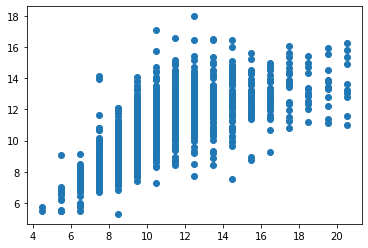

In [137]:
plt.scatter(y_test, y_pred);

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
param_grid = {
    'n_estimators': [10], # Paramters consdidered: [2,5,10,20]
    'learning_rate': [0.1], # Paramters consdidered: [0.1,0.01,0.001,1]
    'random_state':[3],
    'loss':['exponential'] # Paramters consdidered: ['linear','square','exponential']
         }
    
grid_search = GridSearchCV(estimator = ada, param_grid = param_grid, cv = 5)

In [139]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1], 'loss': ['exponential'],
                         'n_estimators': [10], 'random_state': [3]})

In [140]:
grid_search.best_params_

{'learning_rate': 0.1,
 'loss': 'exponential',
 'n_estimators': 10,
 'random_state': 3}

In [141]:
best_grid = grid_search.best_estimator_
best_grid

AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=10,
                  random_state=3)

In [142]:
best_grid.feature_importances_

array([0.00183046, 0.01204181, 0.01454873, 0.01002318, 0.01554851,
       0.9460073 ])

In [143]:
# R square on training data
ab_rsq_train = round(best_grid.score(x_train, y_train),3)
print(ab_rsq_train)

0.432


In [144]:
# R square on testing data
ab_rsq_test = round(best_grid.score(x_test, y_test),3)
print(ab_rsq_test)

0.377


In [146]:
#RMSE on Training data
predicted_train=best_grid.fit(x_train, y_train).predict(x_train)
ab_rmse_train = round(np.sqrt(metrics.mean_squared_error(y_train,predicted_train)),3)
print(ab_rmse_train)

2.172


In [147]:
y_pred = best_grid.predict(x_test)
y_pred

array([12.62222222,  9.25039002, 13.34713376, ..., 12.92098093,
        9.4538715 , 12.89088398])

In [148]:
#RMSE on Testing data
predicted_test=best_grid.fit(x_train, y_train).predict(x_test)
ab_rmse_test = round(np.sqrt(metrics.mean_squared_error(y_test,predicted_test)),3)
print(ab_rmse_test)

2.19


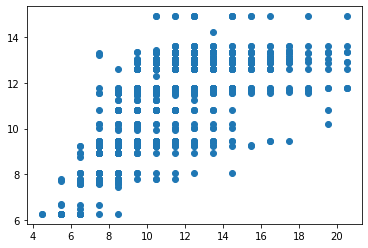

In [149]:
plt.scatter(y_test, y_pred);

In [150]:
print(pd.DataFrame({'Train RMSE': [rfr_rmse_train,ab_rmse_train],'Test RMSE': [rfr_rmse_test, ab_rmse_test],'Train R2': [rfr_rsq_train, ab_rsq_train],'Test R2': [rfr_rsq_test, ab_rsq_test]},
            index=['Random Forest Regression','Adaboost Regression']))

                          Train RMSE  Test RMSE  Train R2  Test R2
Random Forest Regression       1.540      2.038     0.714    0.461
Adaboost Regression            2.172      2.190     0.432    0.377


In [160]:
#saving the best model(Random Forest Model)
import pickle
filename='rfrfile.pkl'
pickle.dump(rfr,open(filename,'wb'))